# Analiza stanovanj
V tej datoteki je analiza podatkov...

## Hipoteze
* Najdrazja najmenina na kvadraturo je ob morju, takoj za tem pa ji sledi Ljubljana.
* Velikost stanovanja (stevilo sob) ima vecji pomen za ceno kot kvadratura
* V kateri regiji je največ aktivnih oglasov in v kateri regiji oddajajo novejša stanovanja(po letu 2010)
* Ali so stanovanja označena kot primerna za študente dražja v primerjavi z ostalimi? Ali spadajo ta stanovanja med straejša? (hipoteza: da)

In [1]:
import pandas as pd

In [2]:
Stanovanja = pd.read_csv("obdelani-podatki\podatki.csv", index_col='id')

In [3]:
Stanovanja

,kvadratura,tip,leto,cena,regija,upravna,obcina
id,,,,,,,
5332996,50.0,3-sobno,2015,95.0,Istrska,VSE,Novigrad (Istra)
5568627,15.0,soba,2010,250.0,Koroška,Slovenj Gradec,Slovenj Gradec
5625423,70.0,apartma,2012,80.0,J. Primorska,Izola,Izola
5649165,18.0,garsonjera,2012,350.0,J. Primorska,Piran,Piran
5684479,126.0,3-sobno,1933,1100.0,LJ-mesto,Lj. Center,Ljubljana
...,...,...,...,...,...,...,...
6374194,62.6,2-sobno,2019,800.0,LJ-mesto,Lj. Center,Ljubljana
6374195,54.0,"1,5-sobno",2019,700.0,LJ-mesto,Lj. Vič-Rudnik,Ljubljana
6374204,76.0,3-sobno,2018,950.0,LJ-mesto,Lj. Bežigrad,Ljubljana


In [4]:
slo_stanovanja = Stanovanja[(Stanovanja.regija != 'Šibeniško-kninska') & (Stanovanja.regija != 'Istrska') & (Stanovanja.regija != 'Primorsko-goranska')]

### Mesečna najmenina na $m^2$ po regijah

Za začetek si poglejmo kakšna je povprečna mesečna najemnina stanovanja.

In [5]:
sum(slo_stanovanja.cena) // 1710

719.0

Naprej si oglejmo prvih 5 najvišjih najemnin po regijah.

In [6]:
slo_stanovanja[['kvadratura', 'cena', 'regija']].sort_values('cena', ascending=False).head(5)

,kvadratura,cena,regija
id,,,
6350807,217.14,8000.0,LJ-mesto
6350921,220.30,7000.0,LJ-mesto
6208667,244.20,3500.0,LJ-mesto
6145130,204.70,3300.0,LJ-mesto
6119316,149.70,3100.0,LJ-mesto


Za razliko od hipoteze se prvih 5 najdražjih stanovanj v najem oddaja v Ljubljani(mesto). Poglejmo ali je morda $cena / m^2$ bližja naši hipotezi.

In [7]:
Stanovanja['cena_kvad'] = (Stanovanja.cena // Stanovanja.kvadratura)
slo_stanovanja = Stanovanja[(Stanovanja.regija != 'Šibeniško-kninska') & (Stanovanja.regija != 'Istrska') & (Stanovanja.regija != 'Primorsko-goranska')]

In [8]:
sum(slo_stanovanja.cena_kvad) // 1710

11.0

Kvadratni meter se v Sloveniji v povprečju oddaja za 11€

In [9]:
slo_stanovanja[['cena_kvad', 'kvadratura', 'cena', 'regija']].sort_values('cena_kvad', ascending=False).head(5)

,cena_kvad,kvadratura,cena,regija
id,,,,
6373737,100.0,12.0,1200.0,LJ-mesto
6349093,53.0,9.3,500.0,LJ-mesto
6349088,41.0,14.3,600.0,LJ-mesto
6339175,36.0,15.0,550.0,LJ-mesto
6356638,36.0,13.0,480.0,LJ-mesto


Kot vidimo se sam vrh najemnin na kvadratni meter ponovno pojavlja v Ljubljani.

Oglejmo si še povprečje

In [10]:
Stanovanja_po_regijah = slo_stanovanja.groupby('regija')

In [11]:
Stanovanja_po_regijah.mean()[['cena_kvad', 'kvadratura', 'cena']].sort_values('cena_kvad', ascending=False)

,cena_kvad,kvadratura,cena
regija,,,
LJ-mesto,13.377477,66.648775,853.748649
J. Primorska,12.062500,50.646806,567.638889
LJ-okolica,10.192661,61.023119,547.981651
Gorenjska,9.906977,56.954651,532.558140
Koroška,9.555556,31.113333,250.888889
S.Primorska,8.600000,67.190000,452.500000
Notranjska,8.125000,48.290000,338.125000
Podravska,7.901235,57.987407,436.839506
Dolenjska,7.072727,52.134545,335.545455


Hipoteza torej ne drži. Najem stanovanj je najdražji v Ljubljani in ne na primorskem. Kljub temu smo se hipotezi pribrižali, saj je cena kvadratnega metra nad povprečjem ($11€/m^2$) prav v ljubljanski in primorski regiji. Tik pod povprečjem je okolica Ljubljane, najnižje cene pa so v zasavski regiji po $4.5€/m^2$.

Ali visoke cene vplivajo na povprečno velikost stanovanj, ki se gradijo v določeni regiji? Za primerjavo si poglejmo spodnji graf.

<AxesSubplot:ylabel='regija'>

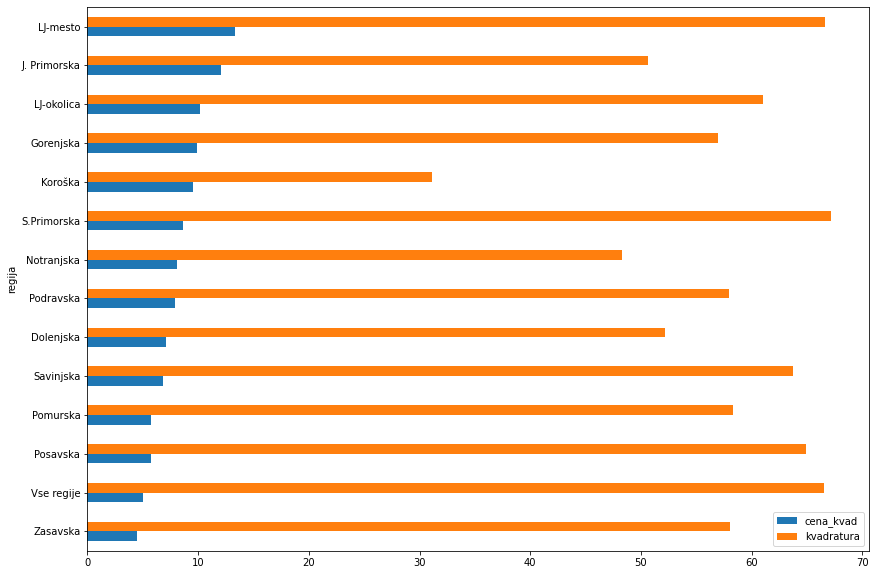

In [12]:
Stanovanja_po_regijah.mean()[['cena_kvad', 'kvadratura']].sort_values('cena_kvad', ascending=True).plot.barh(figsize=(14,10))

Opazimo lahko, da visoka cena kvadrature v Ljubljani ne vpliva na oddajo velikih stanovanj. Nekoliko večja razlika je na južno-primorskem, kjer povprečna kvadratura nekoliko nižja

Za boljši občutek o odvisnosti cene od kvadrature si poglejmo še spodnji graf.

<AxesSubplot:xlabel='kvadratura', ylabel='cena'>

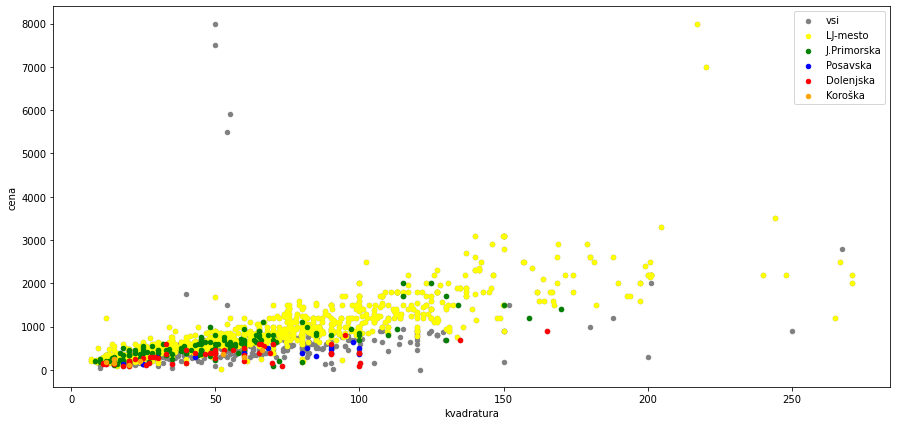

In [13]:
ax = Stanovanja.plot.scatter(y='cena', x='kvadratura', color='Grey', label='vsi')
Stanovanja[Stanovanja.regija == 'LJ-mesto'].plot.scatter(y='cena', x='kvadratura', color='Yellow', label='LJ-mesto', ax=ax)
Stanovanja[Stanovanja.regija == 'J. Primorska'].plot.scatter(y='cena', x='kvadratura', color='Green', label='J.Primorska', ax=ax)
Stanovanja[Stanovanja.regija == 'Posavska'].plot.scatter(y='cena', x='kvadratura', color='Blue', label='Posavska', ax=ax)
Stanovanja[Stanovanja.regija == 'Dolenjska'].plot.scatter(y='cena', x='kvadratura', color='Red', label='Dolenjska', ax=ax)
Stanovanja[Stanovanja.regija == 'Koroška'].plot.scatter(y='cena', x='kvadratura', color='Orange', label='Koroška', ax=ax, figsize=(15,7))


Opazimo, da v ljubljanski in južno primorski regiji najemnina v odvisnosti od kvadrature strmeje narašča kot v ostalih.

### Vpliv števila sob ter kvadrature na ceno stanovanja
Ugotovili smo, da ima lokacija velik vpliv na višino najemnin. Dalje nas zanima kolikšen pomen ima poleg kvadrature tudi število sob v stanovanju.

In [14]:
Stanovanja['cena_zaokrozeno'] = 100 * (Stanovanja.cena // 100)
slo_stanovanja = Stanovanja[(Stanovanja.regija != 'Šibeniško-kninska') & (Stanovanja.regija != 'Istrska') & (Stanovanja.regija != 'Primorsko-goranska')]

In [44]:
Stanovanja_sobe = Stanovanja[(Stanovanja.tip != 'apartma') & (Stanovanja.tip != '1-sobni nadstandardni apartma') & (Stanovanja.tip != 'nadstandardna soba') & (Stanovanja.tip != 'stanovanje') & (Stanovanja.tip != '2- sobno')]

In [45]:
Stanovanja_sobe

,kvadratura,tip,leto,cena,regija,upravna,obcina,cena_kvad,cena_zaokrozeno
id,,,,,,,,,
5332996,50.0,3-sobno,2015,95.0,Istrska,VSE,Novigrad (Istra),1.0,0.0
5568627,15.0,soba,2010,250.0,Koroška,Slovenj Gradec,Slovenj Gradec,16.0,200.0
5649165,18.0,garsonjera,2012,350.0,J. Primorska,Piran,Piran,19.0,300.0
5684479,126.0,3-sobno,1933,1100.0,LJ-mesto,Lj. Center,Ljubljana,8.0,1100.0
5837567,20.0,garsonjera,2017,400.0,LJ-okolica,Domžale,Domžale,20.0,400.0
...,...,...,...,...,...,...,...,...,...
6374194,62.6,2-sobno,2019,800.0,LJ-mesto,Lj. Center,Ljubljana,12.0,800.0
6374195,54.0,"1,5-sobno",2019,700.0,LJ-mesto,Lj. Vič-Rudnik,Ljubljana,12.0,700.0
6374204,76.0,3-sobno,2018,950.0,LJ-mesto,Lj. Bežigrad,Ljubljana,12.0,900.0


In [54]:
custom_dict = {'soba': 0, 'garsonjera': 1, '1,5-sobno': 2, '1-sobno': 3, '2-sobno': 4,'2,5-sobno': 5,'3-sobno': 6,'3,5-sobno': 7, '4-sobno': 8, '4,5-sobno': 9, '5 in večsobno': 10}
preurejen = Stanovanja_sobe[Stanovanja_sobe.regija == 'LJ-mesto'].sort_values(by=['tip'], key=lambda x: x.map(custom_dict))


<AxesSubplot:xlabel='tip', ylabel='kvadratura'>

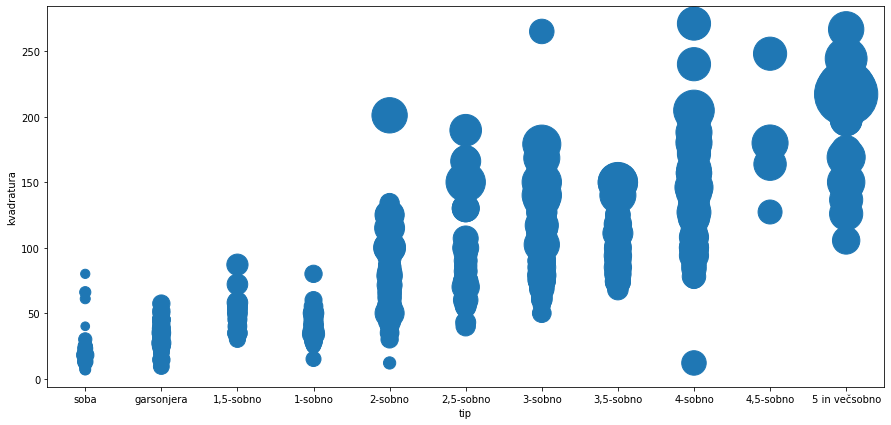

In [55]:

preurejen.plot.scatter(x='tip', y='kvadratura', s=preurejen['cena']//2, figsize=(15,7))

Na zgornjem grafu predstavljajo pol

### Vpliv starosti stanovanj
Zanima nas kako se je velikost zgrajenih stanovanj spreminjala glede na starost

In [19]:
Stanovanja

,kvadratura,tip,leto,cena,regija,upravna,obcina,cena_kvad,cena_zaokrozeno
id,,,,,,,,,
6372912,45.0,1-sobno,1038,550.0,LJ-mesto,Lj. Center,Ljubljana,12.0,500.0
6286137,93.0,2-sobno,1550,1100.0,LJ-mesto,Lj. Center,Ljubljana,11.0,1100.0
6334112,120.0,3-sobno,1550,900.0,LJ-mesto,Lj. Center,Ljubljana,7.0,900.0
6334111,120.0,3-sobno,1550,900.0,LJ-mesto,Lj. Center,Ljubljana,7.0,900.0
6369383,59.0,2-sobno,1560,700.0,LJ-mesto,Lj. Center,Ljubljana,11.0,700.0
...,...,...,...,...,...,...,...,...,...
6370327,56.8,"2,5-sobno",2020,950.0,LJ-mesto,Lj. Center,Ljubljana,16.0,900.0
6368702,103.3,3-sobno,2020,1500.0,LJ-mesto,Lj. Bežigrad,Ljubljana,14.0,1500.0
6360163,70.0,3-sobno,2020,850.0,LJ-mesto,Lj. Center,Ljubljana,12.0,800.0
